<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=ZCzIoaGls4g

import sympy as sp
import sympy.physics.mechanics as sp_mech

m, g, ell, t = sp.symbols('m g ell t')
theta = sp_mech.dynamicsymbols('theta')

xm = ell * sp.sin(theta)
xm

ell⋅sin(θ(t))

In [ ]:
ym = -ell * sp.cos(theta)
ym

-ell⋅cos(θ(t))

In [ ]:
xm_dot = sp.diff(xm, t)
xm_dot

              d       
ell⋅cos(θ(t))⋅──(θ(t))
              dt      

In [ ]:
ym_dot = sp.diff(ym, t)
ym_dot

              d       
ell⋅sin(θ(t))⋅──(θ(t))
              dt      

In [ ]:
theta_dot = sp.diff(theta, t)
theta_dot

d       
──(θ(t))
dt      

In [ ]:
theta_ddot = sp.diff(theta_dot, t)
theta_ddot

 2       
d        
───(θ(t))
  2      
dt       

In [ ]:
T = sp.Rational(1, 2) * m * (xm_dot ** 2 + ym_dot ** 2)
T

  ⎛                          2                             2⎞
  ⎜   2    2       ⎛d       ⎞       2    2       ⎛d       ⎞ ⎟
m⋅⎜ell ⋅sin (θ(t))⋅⎜──(θ(t))⎟  + ell ⋅cos (θ(t))⋅⎜──(θ(t))⎟ ⎟
  ⎝                ⎝dt      ⎠                    ⎝dt      ⎠ ⎠
─────────────────────────────────────────────────────────────
                              2                              

In [ ]:
V = m * g * ym
V

-ell⋅g⋅m⋅cos(θ(t))

In [ ]:
L = T - V
L

                      ⎛                          2                             2⎞
                      ⎜   2    2       ⎛d       ⎞       2    2       ⎛d       ⎞ ⎟
                    m⋅⎜ell ⋅sin (θ(t))⋅⎜──(θ(t))⎟  + ell ⋅cos (θ(t))⋅⎜──(θ(t))⎟ ⎟
                      ⎝                ⎝dt      ⎠                    ⎝dt      ⎠ ⎠
ell⋅g⋅m⋅cos(θ(t)) + ─────────────────────────────────────────────────────────────
                                                  2                              

In [ ]:
eqn = sp.diff(sp.diff(L, theta_dot), t) - sp.diff(L, theta)
eqn

                      ⎛                   2                             2       ⎞
                      ⎜     2    2       d                2    2       d        ⎟
                    m⋅⎜2⋅ell ⋅sin (θ(t))⋅───(θ(t)) + 2⋅ell ⋅cos (θ(t))⋅───(θ(t))⎟
                      ⎜                    2                             2      ⎟
                      ⎝                  dt                            dt       ⎠
ell⋅g⋅m⋅sin(θ(t)) + ─────────────────────────────────────────────────────────────
                                                  2                              

In [ ]:
sln = sp.solve(eqn, theta_ddot)[0]
sp.Eq(theta_ddot, sln)

 2                       
d           -g⋅sin(θ(t)) 
───(θ(t)) = ─────────────
  2              ell     
dt                       

In [ ]:
x = sp.Matrix([theta, theta_dot])
x_dot = sp.diff(x, t)
sp.Eq(x_dot, sp.Matrix([theta_dot, sln]))

⎡d        ⎤                  
⎢──(θ(t)) ⎥   ⎡  d          ⎤
⎢dt       ⎥   ⎢  ──(θ(t))   ⎥
⎢         ⎥   ⎢  dt         ⎥
⎢ 2       ⎥ = ⎢             ⎥
⎢d        ⎥   ⎢-g⋅sin(θ(t)) ⎥
⎢───(θ(t))⎥   ⎢─────────────⎥
⎢  2      ⎥   ⎣     ell     ⎦
⎣dt       ⎦                  

In [ ]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

theta_0 = np.deg2rad(30)
theta_dot_0 = 0

fun = sln.subs([(g, 9.81), (ell, 1)])
l_fun = sp.lambdify([theta], fun)

def pendulum_ODE(t, y):
  return (y[1], l_fun(y[0]))

sol = integrate.solve_ivp(pendulum_ODE, [0, 5], (theta_0, theta_dot_0), t_eval=np.linspace(0, 5, 30 * 5))
theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])
t = sol.t

# np.savetxt('pend.txt', np.transpose([theta_deg, theta_dot_deg]), delimiter=',')

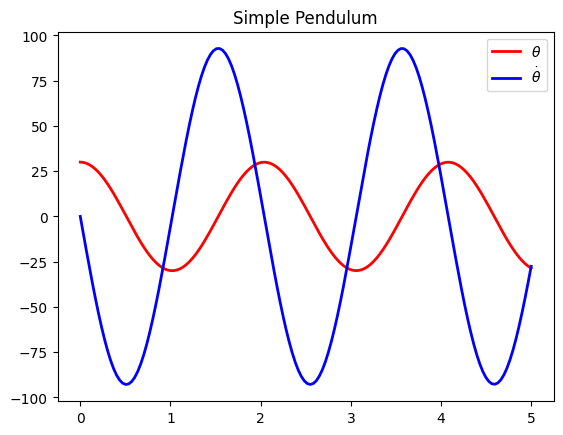

In [ ]:
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.legend()

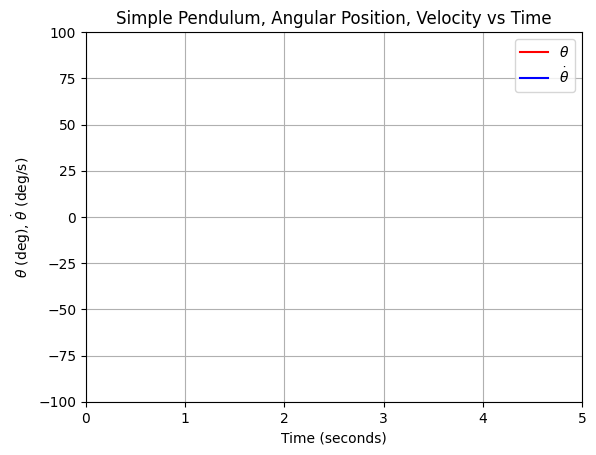

In [ ]:
fig, ax = plt.subplots()

theta_curve, = ax.plot(t[0], theta_deg[0], 'r')
theta_dot_curve, = ax.plot(t[0], theta_dot_deg[0], 'b')

ax.set_title('Simple Pendulum, Angular Position, Velocity vs Time')
ax.set_xlim(0, 5)
ax.set_ylim(-100, 100)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
  theta_curve.set_data(t[:i+1], theta_deg[:i+1])
  theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ani.save('time_domain.mp4', writer=animation.FFMpegWriter(fps=30))

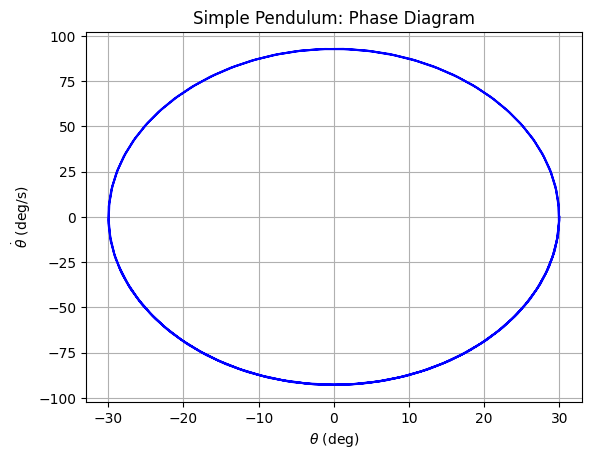

In [ ]:
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()